In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from keras import callbacks
from tensorflow.keras.layers import Dense, Dropout, Input,BatchNormalization,LeakyReLU

In [2]:
data = pd.read_csv(r'E:\Patern Project\churn-bigml-20.csv')
data.sample(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
249,IN,108,415,No,No,0,199.3,104,33.88,224.2,92,19.06,140.1,57,6.30,15.2,2,4.10,0,False
239,NY,167,415,No,No,0,166.4,85,28.29,243.2,135,20.67,229.2,95,10.31,9.9,5,2.67,1,False
465,KY,38,408,No,Yes,36,115.4,98,19.62,166.2,83,14.13,184.7,79,8.31,15.2,6,4.10,2,False
348,CT,163,408,No,Yes,40,231.9,56,39.42,211.8,91,18.00,268.5,74,12.08,12.3,3,3.32,2,False
134,MT,109,408,No,No,0,264.7,69,45.00,305.0,120,25.93,197.4,86,8.88,9.5,9,2.57,1,True


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [4]:
data.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [5]:
# Removing the unnecassary features from the dataset
data=data.drop(['State','Account length','Area code'],axis=1)

In [6]:
label_encoders = {}
for column in ['International plan', 'Voice mail plan']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [7]:
X = data.drop(columns=['Churn'])
y = data['Churn'].astype(bool)

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

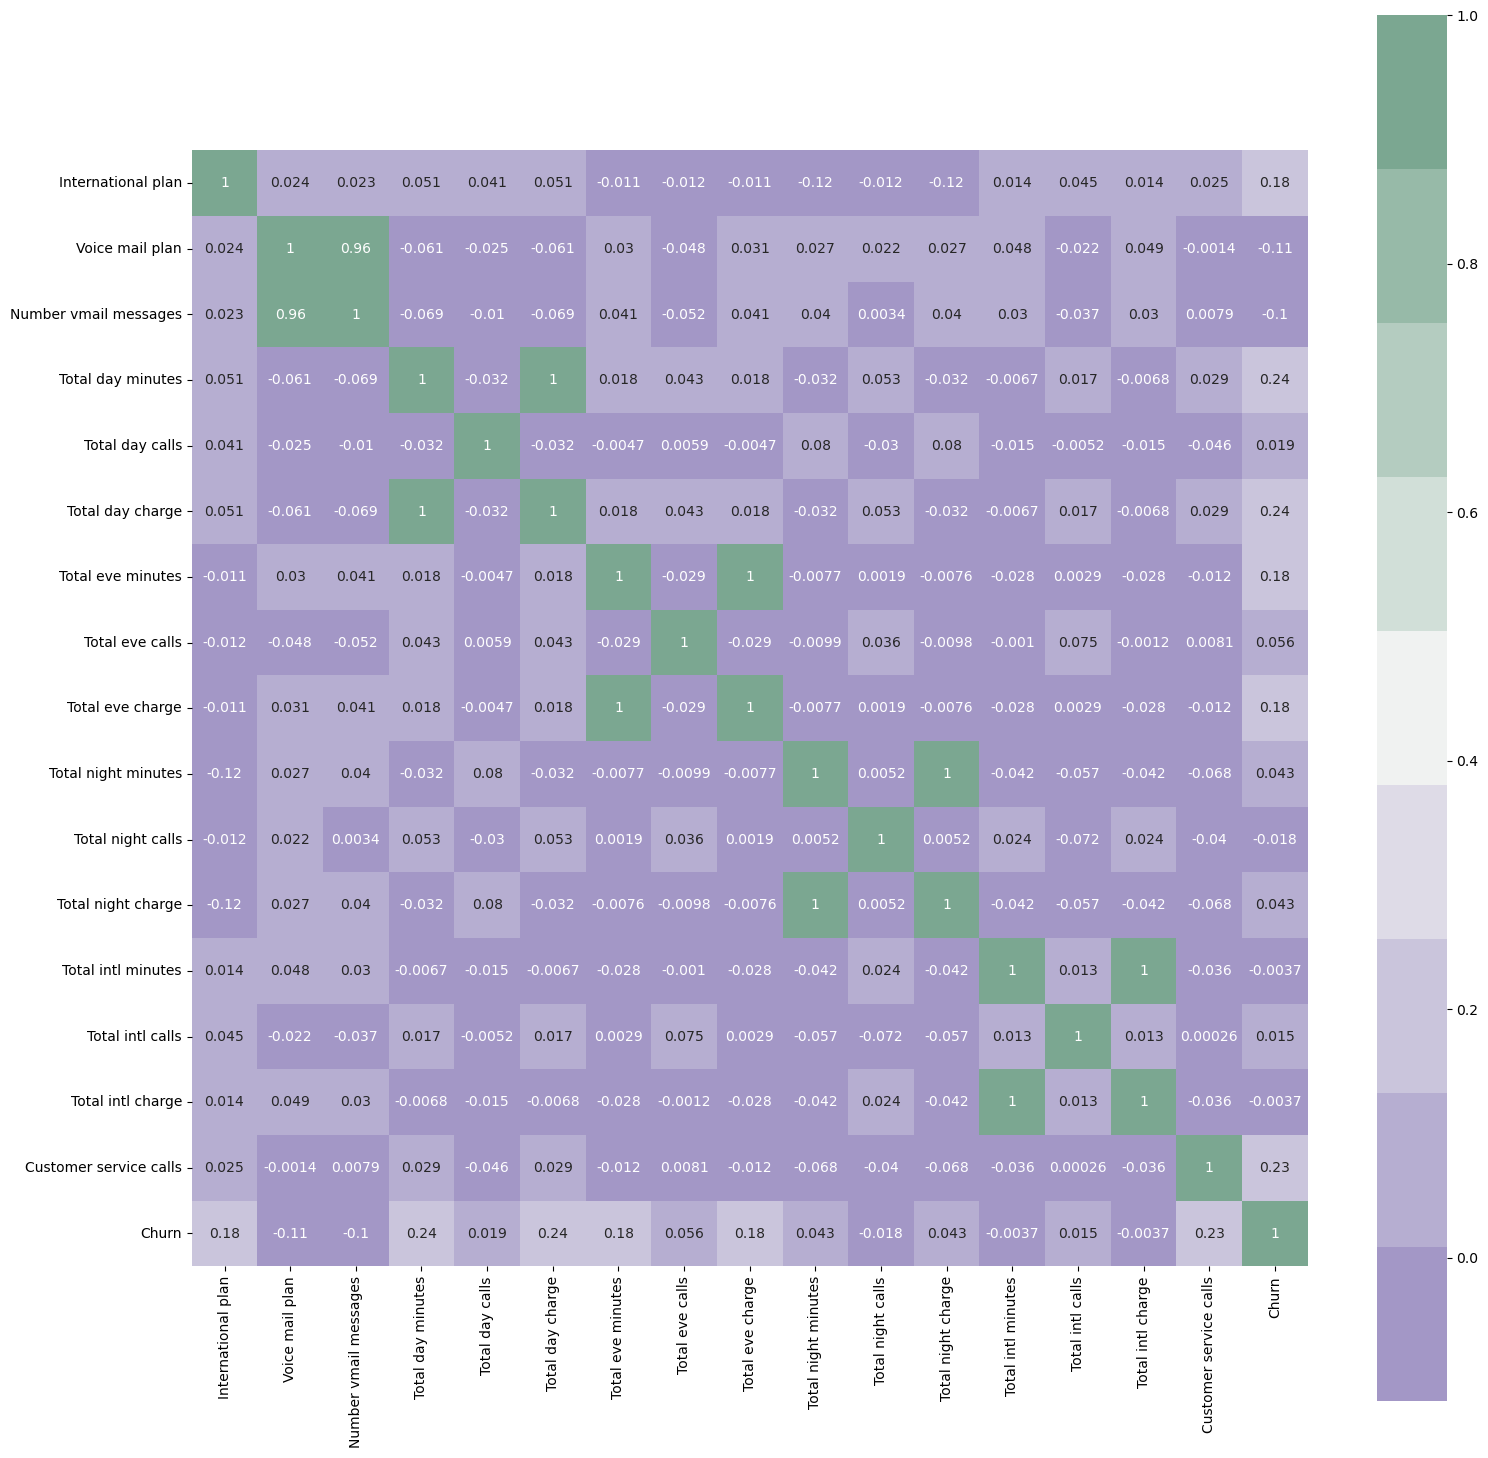

In [10]:
#Examaning a corelation matrix of all the features 
cmap = sns.diverging_palette(275,150,  s=40, l=65, n=9)
corrmat = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True);

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42,shuffle=True)


In [12]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.15, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
  restore_best_weights=True) 

model = Sequential([
    Input(shape=(X_train.shape[1],)), 
    Dense(64, activation='relu', kernel_initializer='he_uniform'),     
    Dropout(0.3), 
    Dense(32, activation='relu', kernel_initializer='he_uniform'),     
    Dropout(0.3), # Dropout 
    Dense(16, activation='relu', kernel_initializer='he_uniform'),    
    Dropout(0.6),                    
    Dense(1, activation='sigmoid')  
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(X_train, y_train, epochs=100, batch_size=16,validation_split=0.2, verbose=1)


Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5329 - loss: 0.9405 - val_accuracy: 0.6221 - val_loss: 0.6523
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5792 - loss: 0.7277 - val_accuracy: 0.6802 - val_loss: 0.6426
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5740 - loss: 0.7277 - val_accuracy: 0.7442 - val_loss: 0.6224
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5565 - loss: 0.7336 - val_accuracy: 0.7791 - val_loss: 0.6093
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6094 - loss: 0.6424 - val_accuracy: 0.7674 - val_loss: 0.5942
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5864 - loss: 0.6623 - val_accuracy: 0.7791 - val_loss: 0.5790
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6484 - loss: 0.6300 - val_accuracy: 0.7733 - val_loss: 0.5532
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6238 - loss: 0.6309 - val_accuracy: 0.7907 - v

In [14]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy: {test_accuracy*100:.2f}%")

Accuracy: 97.20%


In [15]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy*100))


val_accuracy: 89.67%


In [16]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.96      0.97       155
        True       0.96      0.98      0.97       131

    accuracy                           0.97       286
   macro avg       0.97      0.97      0.97       286
weighted avg       0.97      0.97      0.97       286



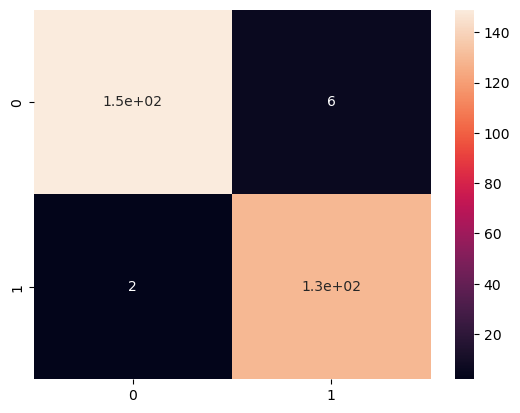

In [17]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix,annot = True)
print("Classification Report:")
print(classification_report(y_test, y_pred))

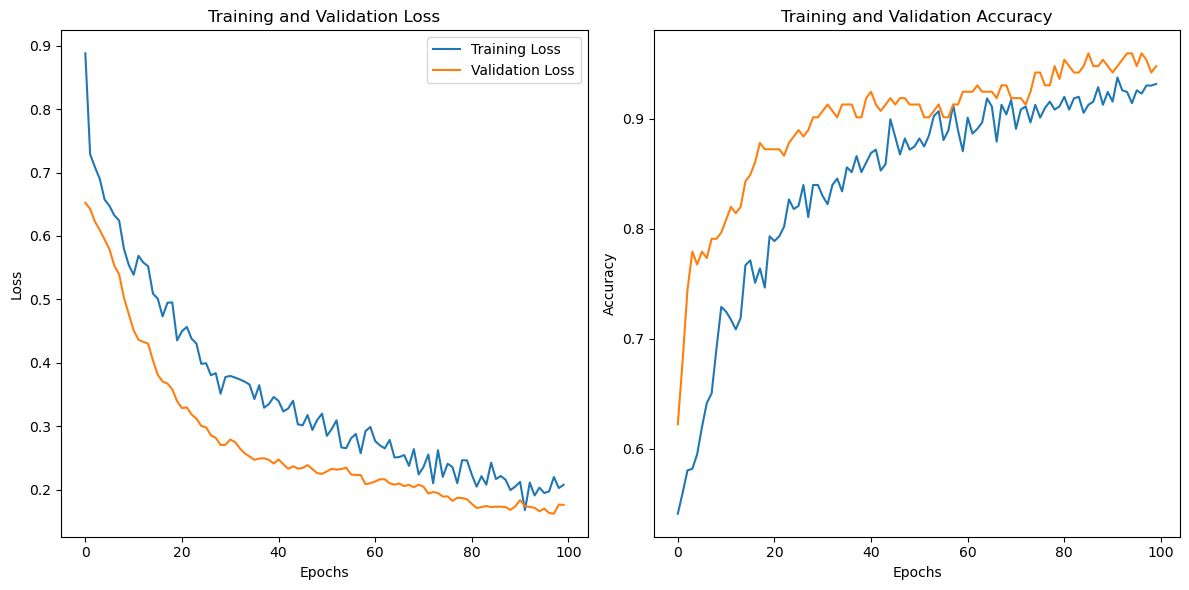

In [18]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
#plt.legend()

plt.tight_layout()
plt.show()


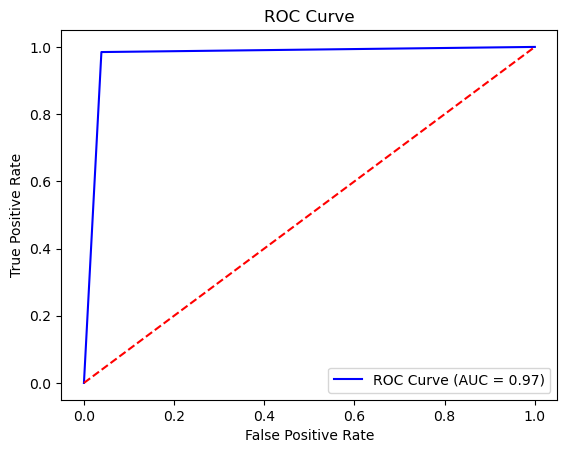

In [19]:
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()